# **How close are we to the Net Zero? How far are we?**

***Analysis of the current stage of energy transition, with data from Global Power Plant Database (World Resources Institute)***


The world needs to reduce its reliance on fossil fuels and increase its use of renewable energy. However, growing energy demand makes it difficult to reach the net-zero goal before the target year 2030. This project will analyse the current or most up-to-date status of the type of energy produced. The goal here is to help the audience understand the current stage of the energy transition and how far we are from achieving net zero, which ideally should lead to actions that contribute to a more sustainable society. 

The questions below are made as main points and to draw the scope of this project. The data used will be extracted from the API of the Global Power Plant Database (World Resources Institute). 

 This analysis aims to answer the questions below and help readers understand the current stage of global energy, supporting informed decision-making.

- How much are we relying on fossil fuels compared to renewables? 
- Why just renewable energy not enough? 
- Which type of power plant produces the most electricity/energy? 
- Which countries rely most on renewables? Why is that? 



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time

plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

## Extracting Data from Global Power Plant Database (World Resources Institute) using API and ZIP URL. 
import requests

response = requests.request(
    "GET",
    "https://datasets.wri.org/api/3/action/resource_show?id=66bcdacc-3d0e-46ad-9271-a5a76b1853d2",
    
)

data = response.json()
data.keys()
#data['result']

dict_keys(['help', 'success', 'result'])

In [3]:
import zipfile
import io

zip_url = "https://datasets.wri.org/private-admin/dataset/53623dfd-3df6-4f15-a091-67457cdb571f/resource/66bcdacc-3d0e-46ad-9271-a5a76b1853d2/download/globalpowerplantdatabasev130.zip"

# Download the ZIP
r = requests.get(zip_url)
z = zipfile.ZipFile(io.BytesIO(r.content))

# List files in the ZIP
z.namelist()

# Load the CSV file into a DataFrame
csv_file = "global_power_plant_database.csv"
df = pd.read_csv(z.open(csv_file))
df.head()

/var/folders/m5/pl7f3qbs4wz97g9ld9_84ysw0000gn/T/ipykernel_63225/3713362479.py:15: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(z.open(csv_file))


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


The most up-to-date available data is from the World Resources Institute (WRI), Global Power Plant Database is from 2017. This could be due to the difficulty and complexity of collecting, verifying, and standardising annual generation data for tens of thousands of power plants across more than 160 countries. This is still considered the most complete and best-verified global baseline possible with publicly available data; therefore, it will be used to best analyse the power plants.

## **Data Cleaning and Preparation**
Remove the unnecessary and missing values columns.  

In [4]:
# Only extract relevant columns
df = df[['country_long', 'name', 'capacity_mw',
        'primary_fuel','latitude', 'longitude',
        'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
        'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
        'estimated_generation_gwh_2017']].copy()
df.head()

,country_long,name,capacity_mw,primary_fuel,latitude,longitude,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,Hydro,32.322,65.1190,123.77,162.90,97.39,137.76,119.50
1,Afghanistan,Kandahar DOG,10.0,Solar,31.670,65.7950,18.43,17.48,18.25,17.70,18.29
2,Afghanistan,Kandahar JOL,10.0,Solar,31.623,65.7920,18.64,17.58,19.10,17.62,18.72
3,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,Hydro,34.556,69.4787,225.06,203.55,146.90,230.18,174.91
4,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,Hydro,34.641,69.7170,406.16,357.22,270.99,395.38,350.80


## **Power Plant Map**
Let visualise quickly by looking at the world map below, the red are power plants using fossil fuels ('Coal', 'Gas', 'Oil'), whereas the blues representing renewables energy such as Hydro, solar and wind power, the yellow representing others that are not or can't be classified in these two categories such as Nuclear power plants. 

By visualising like this, we can immediately summarise that the number of renewable power plants is no less than the fossil fuel power plants, while there are a relatively small number of Nuclear power plants. The numeric comparison of these energy sources is presented in the next section. 

**Note**:The code below is hidden for the project to be able to visualise on github. Uncomment to see the map!

In [5]:
# fossil_fuels = ['Coal', 'Gas', 'Oil', 'Petcoke']
# renewables = ['Hydro', 'Solar', 'Wind', 'Waste', 'Biomass', 'Wave and Tidal', 'Geothermal', 'Cogeneration']

# import folium
# # Center map at global level
# m = folium.Map(location=[20,0], zoom_start=2)

# # Add power plants as circles
# for _, row in df.iterrows():
#     if row['primary_fuel'] in fossil_fuels:
#         color = "firebrick"
#     elif row['primary_fuel'] in renewable:
#         color = "dodgerblue"  # light green
#     else:
#         color = "yellow"  # yellow

#     folium.CircleMarker(
#         location=[row['latitude'], row['longitude']],
#         radius=3,
#         popup=f"{row['name']} ({row['primary_fuel']}) - {row['capacity_mw']} MW",
#         color=color,
#         fill=True,
#         fill_color=color,
#         fill_opacity=0.7
#     ).add_to(m)


# m.save("power_plants_map.html")
# m

## **Number of Power Plants** : *How many are there?*
To understand the current status: the number of power plants that are renewables versus fossil fuels.

In [6]:
# Count number of power plants by fuel type
fuel_counts = df["primary_fuel"].value_counts().reset_index()
fuel_counts.columns = ["Fuel Type", "Number of Plants"]

# Display as a styled table
fuel_counts.style.format({"Number of Plants": "{:,}"}).hide(axis="index").set_caption("Number of Power Plants by Fuel Type").set_table_styles([
    {"selector": "caption", "props": [("font-size", "14px"), ("font-weight", "bold"), ("color", "black"), ("text-align", "center")]}
])

Fuel Type,Number of Plants
Solar,"10,665"
Hydro,"7,156"
Wind,"5,344"
Gas,"3,998"
Coal,"2,330"
Oil,"2,320"
Biomass,"1,430"
Waste,"1,068"
Nuclear,195
Geothermal,189


In [7]:
df['primary_fuel'].unique()

fossil_fuels = ['Coal', 'Gas', 'Oil', 'Petcoke']
renewables = ['Hydro', 'Solar', 'Wind', 'Waste', 'Biomass', 'Wave and Tidal', 'Geothermal', 'Cogeneration']
nuclear = ['Nuclear']

def fuel_category(fuel):
    if fuel in fossil_fuels:
        return "Fossil Fuels"
    elif fuel in renewables:
        return "Renewables"
    elif fuel in nuclear:
        return "Nuclear"
    else:
        return "Other"

# Map each row to a category
df['Fuel Category'] = df['primary_fuel'].apply(fuel_category)

# Group and count
category_counts = df['Fuel Category'].value_counts().reset_index()
category_counts.columns = ["Category", "Number of Plants"]

# Display as a styled table
category_counts.style.hide(axis="index").format({"Number of Plants": "{:,}"}).set_caption("Number of Power Plants by Category").set_table_styles([
    {"selector": "caption", "props": [("font-size", "14px"), ("font-weight", "bold"), ("color", "black"), ("text-align", "center")]}
])

Category,Number of Plants
Renewables,"25,903"
Fossil Fuels,"8,660"
Nuclear,195
Other,178


The 'Coal', 'Gas', 'Oil', and 'Petcoke' (Petroleum coke) are classified as fossil fuels, while'Hydro', 'Solar', 'Wind', 'Waste', 'Biomass', 'Wave and Tidal', 'Geothermal', and 'Cogeneration' are classified as renewables. 

**Comment**: There are much more number of renewable power plants comparing to the fossil fules, this is because renewable is classified for a wider range whereas fossil fuels are limited to only Gas, Oil and Coal and also Petroleum coke for this project. In addition, the fabrication and installation of wind and solar power are much easier and require a much shorter time than the construction of a refinery or distillation site. 

As shown on the table above, there are 25,903 renewables plants compared to only 8,660 fossil fuel power plants. 

Despite the number, have you ever wondered how much really renewable produce? Compared to fossil fuels? What is the percentage worldwide? 

**Note**: Nuclear and Storage are considered neither renewables nor fossil fuels. Petroleum coke is considered a fossil fuel because of its origin as a byproduct of crude oil

## **Energy Generation** : *How much are we relying on the fossil fuels? How much of the total energy generated is from fossil fuels?*

This section will prove that despite the increasing number of renewable plants, most of the energy we use today is produced by fossil fuels.

This will present how much has to be done in order to achieve or get closer to net-zero. 

In [8]:
df['primary_fuel'].unique()

# Select fossil fuels and renewable
fossil_fuels = ['Coal', 'Gas', 'Oil', 'Petcoke']
renewables = ['Hydro', 'Solar', 'Wind', 'Waste', 'Biomass', 'Wave and Tidal', 'Geothermal', 'Cogeneration']

#Calculate total estimated energy generated in 2017
total_energy = df['estimated_generation_gwh_2017'].sum()

# Calculate energy generated by fossil fuels
fossil_energy = df[df['primary_fuel'].isin(fossil_fuels)]['estimated_generation_gwh_2017'].sum()

# Calculate energy generated by renewables
renewable_energy = df[df['primary_fuel'].isin(renewables)]['estimated_generation_gwh_2017'].sum()


# Calculate percentages
fossil_pct = fossil_energy / total_energy * 100
renewable_pct = renewable_energy / total_energy * 100
other_pct = 100 - (fossil_pct + renewable_pct) 

print(f"Fossil Fuels: {fossil_pct:.1f}%")
print(f"Renewable: {renewable_pct:.1f}%")
print(f"Others: {other_pct:.1f}%")

summary = pd.DataFrame({
    "Category": ["Fossil Fuels", "Renewable"],
    "Energy Generated (GWh)": [fossil_energy, renewable_energy],
    "Percentage of Total (%)": [fossil_pct, renewable_pct]
})


summary.style.hide(axis="index").format({
    "Energy Generated (GWh)": "{:,.0f}",
    "Percentage of Total (%)": "{:.1f}%"
}).set_caption("Global Energy Generation in 2017 (Estimated)").set_table_styles([
        {
            "selector": "caption",
            "props": [("font-size", "14px"), ("font-weight", "bold"),("color", "black"),
            ("text-align", "center")]
        }
    ])


Fossil Fuels: 68.1%
Renewable: 19.6%
Others: 12.3%


Category,Energy Generated (GWh),Percentage of Total (%)
Fossil Fuels,"16,176,169",68.1%
Renewable,"4,646,392",19.6%


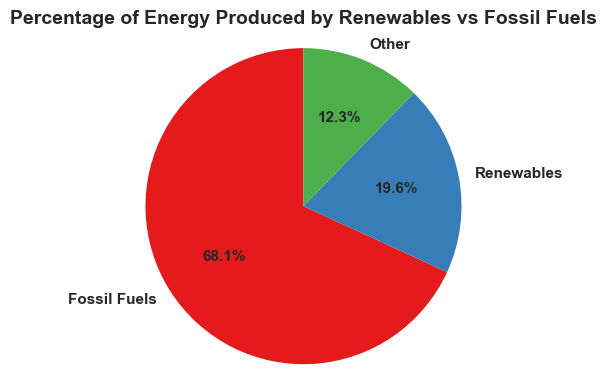

In [11]:
# Combine counts for pie chart
labels = ['Fossil Fuels', 'Renewables', 'Other']
sizes = [fossil_pct, renewable_pct, other_pct]
# Use the already defined 'colors' variable
colors = sns.color_palette("Set1", len(sizes)) # Colour from seaborn(plasma, magma, or cividis)

plt.figure(figsize=(6,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
plt.title('Percentage of Energy Produced by Renewables vs Fossil Fuels', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()


More than half of the energy generated worldwide is from fossil fuels, and only 19.6% is from renewables. This suggests that a lot of work has to be done; for example, nuclear power might be necessary to meet the energy demand. 

### **Installed Capacity**
Installed capacity is the maximum potential electrical power output that a generating unit or an entire power plant can produce under optimal, sustained conditions. This will show the case that if we push the renewable sources to the limit at the current stage, what percentage will the percentage be like. This result will not be that helpful because solar and wind, or even hydro, are relying on uncontrollable factors. Overall, this will show how much the fossil fuel power plant can produce compared to the renewables, excluding the external factors. 

In [ ]:
#Calculate total estimated energy generated in 2017
total_energy = df['capacity_mw'].sum()

# Calculate energy generated by fossil fuels
fossil_energy = df[df['primary_fuel'].isin(fossil_fuels)]['capacity_mw'].sum()

# Calculate energy generated by renewables
renewable_energy = df[df['primary_fuel'].isin(renewables)]['capacity_mw'].sum()


# Calculate percentages
fossil_pct = fossil_energy / total_energy * 100
renewable_pct = renewable_energy / total_energy * 100
other_pct = 100 - (fossil_pct + renewable_pct) 

print(f"Fossil Fuels: {fossil_pct:.1f}%")
print(f"Renewable: {renewable_pct:.1f}%")
print(f"Others: {other_pct:.1f}%")

summary = pd.DataFrame({
    "Category": ["Fossil Fuels", "Renewable"],
    "Installed Capacity (mW)": [fossil_energy, renewable_energy],
    "Percentage of Total (%)": [fossil_pct, renewable_pct]
})


summary.style.hide(axis="index").format({
    "Installed Capacity (mW)": "{:,.0f}",
    "Percentage of Total (%)": "{:.1f}%"
}).set_caption("Installed Capacity (mW)").set_table_styles([
        {
            "selector": "caption",
            "props": [("font-size", "14px"), ("font-weight", "bold"),("color", "black"),
            ("text-align", "center")]
        }
    ])


Fossil Fuels: 65.2%
Renewable: 27.5%
Others: 7.2%


Category,Installed Capacity (mW),Percentage of Total (%)
Fossil Fuels,"3,722,895",65.2%
Renewable,"1,570,844",27.5%


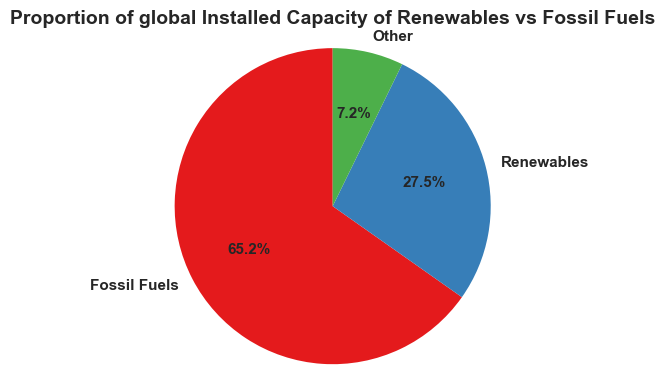

In [ ]:
# Combine counts for pie chart
labels = ['Fossil Fuels', 'Renewables', 'Other']
sizes = [fossil_pct, renewable_pct, other_pct]
# Use the already defined 'colors' variable

plt.figure(figsize=(6,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
plt.title('Proportion of global Installed Capacity of Renewables vs Fossil Fuels', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

The percentage looks better than the amount of energy produced, but still shows that we are very far from achieving net-zero. 

## **Which type of power plant produce the most energy?**  
Have you ever wonder what type of power are we relying on the most? This section will present the share of energy generated by specific type of power plants extended from the comparison between renewables and fossil fuels. This section will also answer the following questions:

- What type of power plant does the world rely on most?
- Why is it used the most?
- Where does most renewable energy come from?

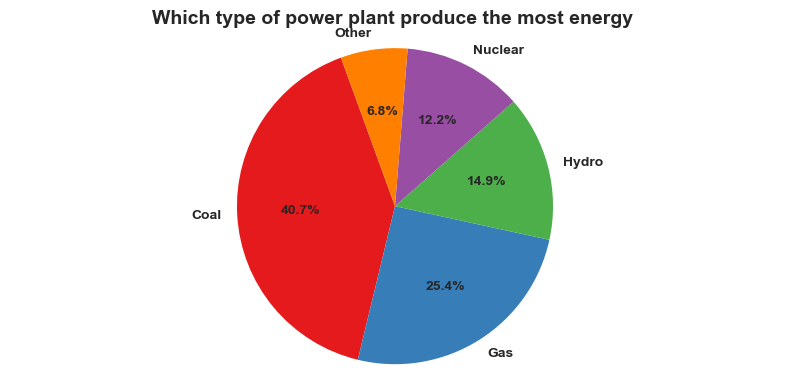

In [15]:
# Select the most recent year available
year = "estimated_generation_gwh_2017"

# Select fossil fuels and renewable
fossil_fuels = ['Coal', 'Gas', 'Oil', 'Petcoke']
renewables = ['Hydro', 'Solar', 'Wind', 'Waste', 'Biomass', 'Wave and Tidal', 'Geothermal', 'Cogeneration']


# Group by primary fuel and sum the energy generated
Plant_energy_estimate = df.groupby("primary_fuel")[year].sum().sort_values(ascending=False) 


# Calculate percentage share for each fuel type
total_energy = Plant_energy_estimate.sum()
percentages = Plant_energy_estimate / total_energy * 100

# Group those less than 10% into 'Other'
main_types = percentages[percentages >= 10]
other_sum = percentages[percentages < 10].sum()


# Prepare final data for pie chart
final_plot = main_types.copy()
if other_sum: 
    final_plot['Other'] = other_sum

final_plot 

colors = sns.color_palette("Set1", len(final_plot))

plt.figure(figsize=(8,4))
plt.pie(
    final_plot,
    labels=final_plot.index,
    autopct='%1.1f%%',
    startangle=110,
    colors=colors,
    textprops={'fontsize': 10, 'fontweight': 'bold'}
)
plt.title("Which type of power plant produce the most energy ", fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

The results show that 40.7% of the energy generated are from coal, this is controversial to the net-zero target because coal is widely known as the single most environmentally damaging energy source, producing the most CO2 emissions of 0.790 kg CO2e/kWh, more than those produced from Oil and Gas (0.602 and 0.497 kg CO2e/kWh respectively). Interestingly, the amount of energy produced coming from oil is lower than 10%, less than those producing from hydro power energy. 

**Opinion:** What make Hydro power the most used renewables?, Why does Oil plants produce such a low share amount of energy comparing to the other sources? 

**Source:** https://questions-statements.parliament.uk/written-questions/detail/2015-11-26/17799

# **What countries can generate the most energy? How good is the UK doing comparing to the US?** 

We all know that China and USA are the leader in technology and energy capacity, the table below shows graphically their installed capacity comparing to the rest of the world. USA produce at least 3 times more than India (the country with the third installed capacity). 

But how renewables are these leaders? producing the most does not mean they are the most renewables due to the growing energy demand which is correlated with the population and emerging of technologies. 

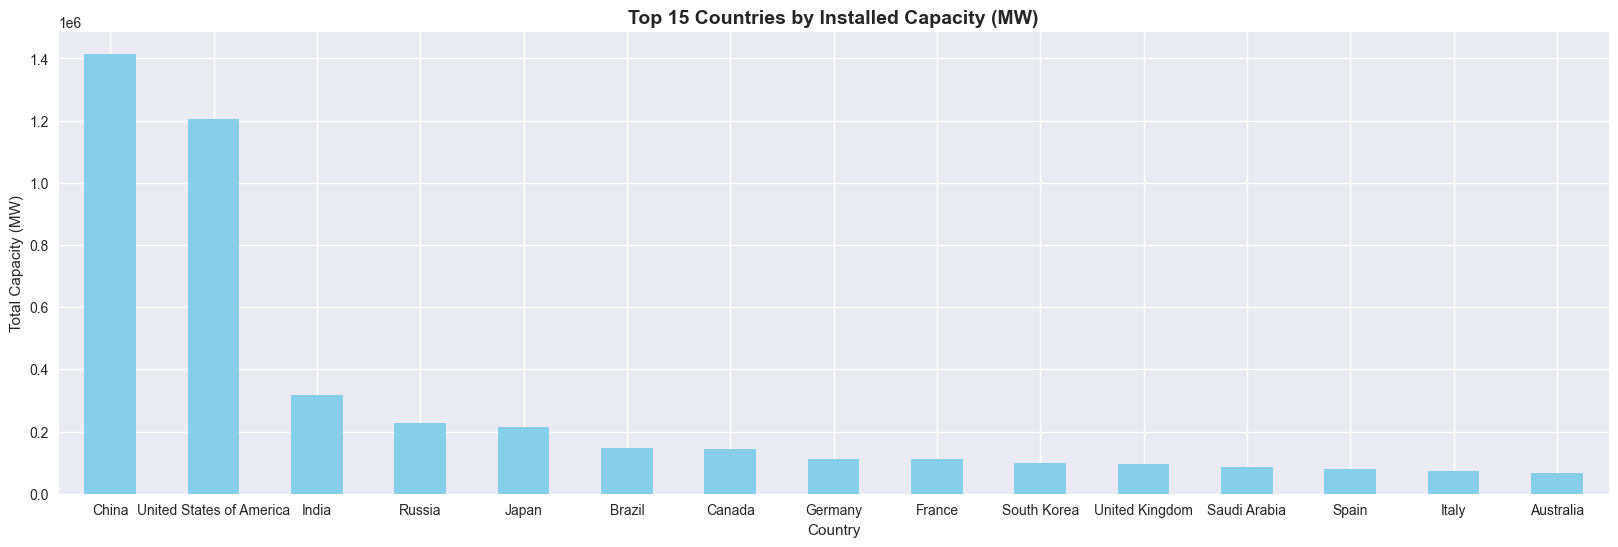

In [ ]:
country_capacity = df.groupby("country_long")["capacity_mw"].sum().sort_values(ascending=False).head(15)

df["country_long"] = df["country_long"].replace('United States of America', 'USA')

plt.figure(figsize=(20,6))
country_capacity.plot(kind="bar", color='skyblue')
plt.title("Top 15 Countries by Installed Capacity (MW)", fontsize=14, fontweight='bold')
plt.ylabel("Total Capacity (MW)")
plt.xlabel("Country")
plt.xticks(rotation=0)
plt.show()


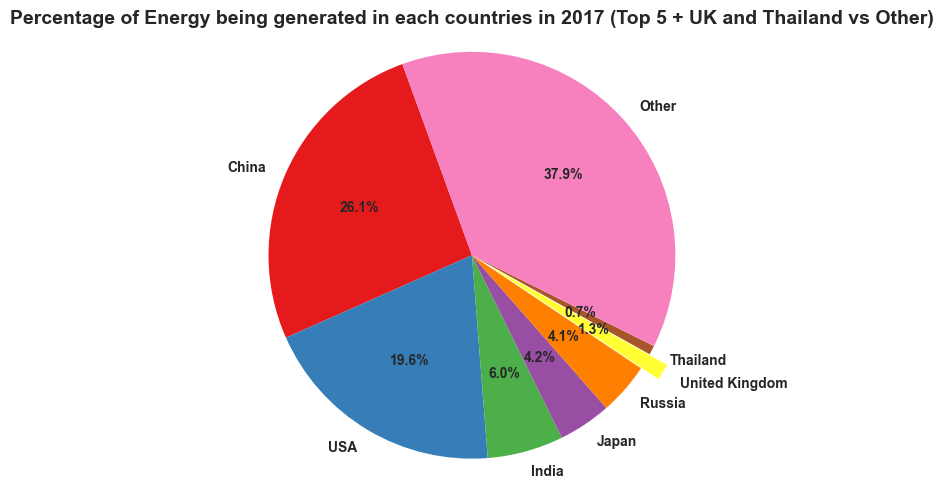

In [ ]:
# Replace 'United States of America' with 'USA' before grouping
# df["country_long"] = df["country_long"].replace('United States of America', 'USA')

# Select the most recent year available
year = "estimated_generation_gwh_2017"

Generate_estimate = df.groupby("country_long")[year].sum().sort_values(ascending=False) 

top5_energy = Generate_estimate.head(5)


uk_energy = Generate_estimate.loc['United Kingdom']
Thailand_energy = Generate_estimate.loc['Thailand']

selected = pd.concat([top5_energy, pd.Series({"United Kingdom": uk_energy}), pd.Series({"Thailand": Thailand_energy})])

other = Generate_estimate.drop(selected.index).sum()  # Drop top 5 and UK, Thailand, sum the rest


# Plot as pie chart
final_plot = pd.concat([selected, pd.Series({"Other": other})])
explode = [0, 0, 0, 0, 0, 0.1, 0, 0 ]  # explode UK & Thailand
colors = sns.color_palette("Set1", len(final_plot)) # Colour from seaborn(plasma, magma, or cividis)

plt.figure(figsize=(8,5))
plt.pie(
    final_plot,
    labels=final_plot.index,
    autopct='%1.1f%%',
    startangle=110,
    colors = colors,
    explode = explode,
    textprops={'fontsize': 10, 'fontweight': 'bold'}
)
plt.title("Percentage of Energy being generated in each countries in 2017 (Top 5 + UK and Thailand vs Other)", fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

China and USA combined use almost half of the world energy generated. 

## **Which countries rely heavily on non-renewable energy?/Which one has to do more work to achieve net-zero?** 

The figure below illustrates the share of installed capacity of the top 10 countries with the highest installed capacity plus the UK, whether they are more relying on fossil fuels, renewables or nuclear. The result shows that both China and USA are relying heavily on renewables, showing that they will need alot of effort and investment and time to achieve the net-zero. 

The result also shows that the United Kingdom is doing better than most countries as lower than 50% of the installed capacity are fossil fuels. 
With the current effort of the government and new energy projects such as Hinky Point C, evolve of small modular nuclear reactor and heavy research from universities, the UK is in the right track of achieving net-zero while comparing to the world leader like USA and China. 

*UK is doing very good! We are on the right track >>>*  

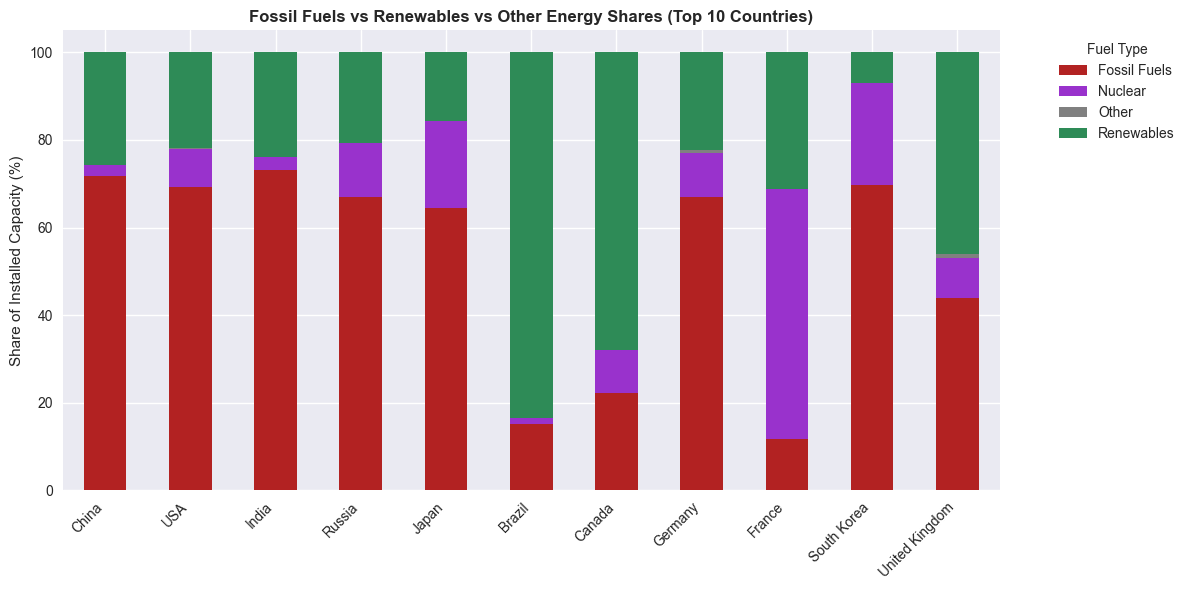

In [ ]:
# --- Define categories ---
fossil_fuels = ["Coal", "Gas", "Oil", "Petcoke"]
renewables = ['Hydro', 'Solar', 'Wind', 'Waste', 'Biomass', 'Wave and Tidal', 'Geothermal', 'Cogeneration']
nuclear = ["Nuclear"]


# --- Assign each plant to a category ---
def categorize_fuel(fuel):
    if fuel in fossil_fuels:
        return "Fossil Fuels"
    elif fuel in renewables:
        return "Renewables"
    elif fuel in nuclear:
        return "Nuclear"
    else:
        return "Other"

df["fuel_category"] = df["primary_fuel"].apply(categorize_fuel)


country_fuel = df.groupby(["country_long", "fuel_category"])["capacity_mw"].sum().unstack(fill_value=0)

# --- Get top 10 countries by total capacity ---
top_countries = country_fuel.sum(axis=1).sort_values(ascending=False).head(11).index
top_data = country_fuel.loc[top_countries]

# --- Normalize to percentages ---
top_data_pct = top_data.div(top_data.sum(axis=1), axis=0) * 100

# --- Plot stacked bar ---
top_data_pct.plot(kind="bar", stacked=True, figsize=(12,6),
                    color=["firebrick", "darkorchid", "grey","seagreen"])

plt.ylabel("Share of Installed Capacity (%)")
plt.xlabel(None)
plt.title("Fossil Fuels vs Renewables vs Other Energy Shares (Top 10 Countries)", fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha="right")
plt.legend(title="Fuel Type", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


In [ ]:
# Define renewable fuels
renewables = ['Hydro', 'Solar', 'Wind', 'Waste', 'Biomass', 'Wave and Tidal', 'Geothermal', 'Cogeneration']

# List of countries to compare
countries = ['Brazil', 'United Kingdom', 'USA']

# Prepare a results dictionary
results = {}

for country in countries:
    country_df = df[df['country_long'] == country]
    total_energy = country_df['capacity_mw'].sum()
    renewable_energy = country_df[country_df['primary_fuel'].isin(renewables)]['capacity_mw'].sum()
    pct_renewable = (renewable_energy / total_energy * 100) if total_energy > 0 else 0
    results[country] = pct_renewable

# Display results
for country, pct in results.items():
    print(f"{country}: {pct:.1f}% renewable energy (2017 estimate)")

Brazil: 83.4% renewable energy (2017 estimate)
United Kingdom: 46.1% renewable energy (2017 estimate)
USA: 21.9% renewable energy (2017 estimate)


### **Interesting result is that, 83.4% of Brazil's installed capacity is renewables, more than any other countries. Why is that?? What make Brazil so good?**


However, Brazil is not close to achieving overall net-zero emissions. Unlike many countries where the energy sector is the biggest polluter, Brazil's emissions are dominated by Land Use, Land-Use Change, and Forestry (LULUCF). The primary driver of these emissions is deforestation, particularly in the Amazon, followed by the agriculture sector.

- How much are we relying on the fossil fuels comparing to renewables? 
- Why just renewable energy is not enough? Energy demand 
- Which type of power plant produce is the most use? Coal 
- Which countries rely most on renewables? Why is that? Brazil 


**Reflection and suggestion for next step:** The US and China together are responsible for almost half of the world energy generation and installed capacity. However, both still relying most on the fossil fuels, suggesting how much work have to be done, for the world leaders. Their effort for energy transition can set an example for the rest of the world and affect how renewables the world is significantly. 


The UK is on the right track, though other assessment will be required to validate because carbon emissions is increasing from factors like transportation and industry.   